#**بسم الله الرحمن الرحيم**

## Import libraries 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.datasets import make_regression 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score



---


#  Neural Network (From Scratch)



In [ ]:
class Layer():
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    def sigmoid(self, x):
      return 1/(1+np.exp(-x))


    def driv_sigmoid(self, x):
      return self.sigmoid(x)*(1-self.sigmoid(x))

    def forward_propagation(self, input_data):
        self.input = input_data
        self.sum = np.dot(self.input, self.weights) + self.bias
        self.output = self.sigmoid(self.sum)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        output_error = self.driv_sigmoid(self.sum) * output_error
        delta = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        dBias = output_error

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return delta

In [ ]:
class Net:
    def __init__(self):
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)

    def predict(self, input_data):
        input_data = input_data.reshape((input_data.shape[0],1,input_data.shape[1]))
        result = []

        for sample in input_data:
            for layer in self.layers:
                output = layer.forward_propagation(sample)
                sample = output   
            result.append(output)

        return result

    def mse(self,y_true, y_pred):
      return np.mean(np.power(y_true-y_pred, 2))


    def driv_mse(self,y_true, y_pred):
      return 2*(y_pred-y_true)/y_true.size

    def cross_entropy(y_real, y_pred):
      return -1*(y_real*np.log(y_pred) + (1-y_real)*np.log(1-y_pred))

    def driv_cross_entropy(y_real, y_pred):
      return (y_real/y_pred)+((1-y_real)/(1-y_pred))

    def fit(self, x_train, y_train, epochs=1000, learning_rate=0.01):
        x_train = x_train.reshape((x_train.shape[0],1,x_train.shape[1]))
        y_train = y_train.reshape((y_train.shape[0],1,1))

        samples = len(x_train)
        print('============================================================')
        for i in range(epochs):
            err = 0
            for sample,y_true in zip(x_train,y_train):
                for layer in self.layers:
                    output = layer.forward_propagation(sample)
                    sample = output

                err += self.mse(y_true, output)
                error = self.driv_mse(y_true, output)

                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            err /= samples
            print('|| epoch: '+ '%5s' % str(i+1)+'          error: ' + '%25s' % str(err) + ' ||')
        print('============================================================')



---


# **Creating Dumy Dataset**






---


##Regresion Dumy Dataset

In [ ]:
reg_x,reg_y = make_regression(n_samples=100, n_features=5, noise=50, random_state=40) 

X_t = pd.DataFrame(reg_x)
print(X_t.describe())

###  data preprocessing

*   normlize features







In [ ]:
scaler = MinMaxScaler()
reg_scaled_X = scaler.fit_transform(reg_x)

reg_y=reg_y.reshape(reg_y.shape[0],1)
reg_scaled_Y= scaler.fit_transform(reg_y)

X_t = pd.DataFrame(reg_scaled_X)
print(X_t.describe())

In [ ]:
reg_X_train,reg_X_test,reg_y_train,reg_y_test = train_test_split(reg_scaled_X,reg_scaled_Y,test_size=0.1)



---


##Classification Dumy Dataset

In [ ]:
cls_x,cls_y = make_classification(n_features=10,n_classes=2)


X_t = pd.DataFrame(cls_x)
print(X_t.describe())



###  data preprocessing
*   normlize features





In [ ]:
scaler = MinMaxScaler()
cls_scaled_X = scaler.fit_transform(cls_x)


X_t = pd.DataFrame(cls_scaled_X)
print(X_t.describe())

In [ ]:
cls_X_train,cls_X_test,cls_y_train,cls_y_test = train_test_split(cls_scaled_X,cls_y,test_size=0.1)



---


# **Tests on Dumy Datasets**



---


##Create Model for Regresion

In [ ]:
net = Net()
net.add(Layer(5, 100))
net.add(Layer(100, 50))
net.add(Layer(50, 100))
net.add(Layer(100, 1))

# train
net.fit(reg_X_train, reg_y_train, epochs=2000, learning_rate=0.01)

In [ ]:
prediction = net.predict(reg_X_test)
print(pow((prediction-reg_y_test),2).sum()/len(prediction))

0.41877728023809996




---


##Create Model for Classification

In [ ]:
net = Net()
net.add(Layer(10, 100))
net.add(Layer(100, 50))
net.add(Layer(50, 100))
net.add(Layer(100, 1))

net.fit(cls_X_train, cls_y_train, epochs=2000, learning_rate=0.01)

In [ ]:
prediction = net.predict(cls_X_test)
for i in range(len(prediction)) :
        if (prediction[i]>0.5):
            prediction[i]=1
        else:
            prediction[i]=0
ac = accuracy_score(cls_y_test,prediction)
ac*100

80.0



---


#Apply on "Boston House Price" Dataset


In [ ]:
boston = datasets.load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

##Feature Preprocessing

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
bost = pd.DataFrame(boston.data, columns = boston.feature_names)
bost['PRICE'] = boston.target

In [ ]:
bost.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


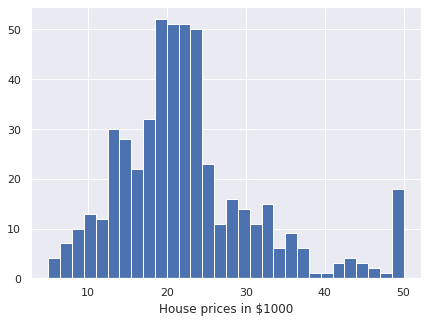

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
plt.hist(bost['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

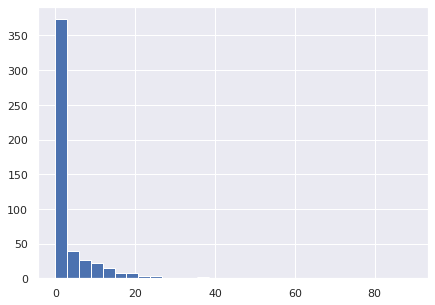

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
plt.hist(bost['CRIM'], bins=30)
plt.show()

In [ ]:
bad = []

In [ ]:
bad = bad +[i for i,m in enumerate(bost['CRIM']) if m >40]
len(bad)

6

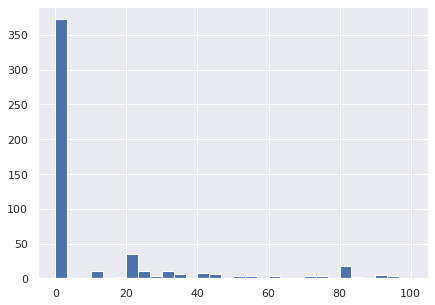

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
plt.hist(bost['ZN'], bins=30)
plt.show()

In [ ]:
bad = bad +[i for i,m in enumerate(bost['ZN']) if m >60]
len(bad)

41

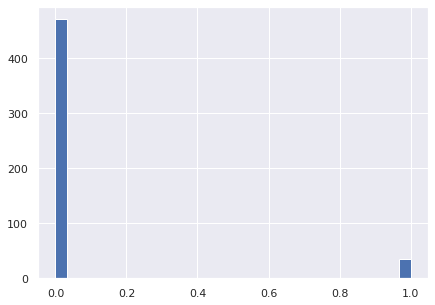

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
plt.hist(bost['CHAS'], bins=30)
plt.show()

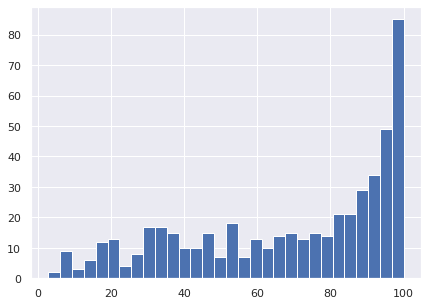

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
plt.hist(bost['AGE'], bins=30)
plt.show()

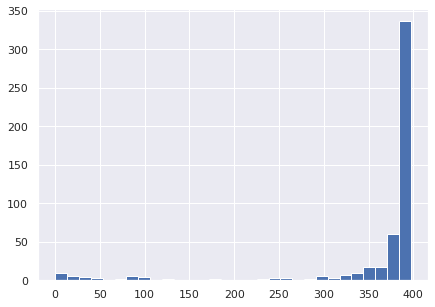

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
plt.hist(bost['B'], bins=30)
plt.show()

In [ ]:
bad = bad +[i for i,m in enumerate(bost['B']) if m < 200]
len(bad)

80

In [ ]:
bost = bost.drop('CHAS',axis=1)

In [ ]:
bost

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
bad = list(set(bad))

In [ ]:
bost = bost.drop(index=bad,axis=0)

In [ ]:
bost

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
y = bost['PRICE']
x = bost.drop('PRICE',axis=1)
x=x.to_numpy()
y=y.to_numpy()

In [ ]:
scaler = StandardScaler()
x_stand= scaler.fit_transform(x)
y_stand= scaler.fit_transform(y.reshape(y.shape[0],1))

In [ ]:
scaler = MinMaxScaler()
x_norm= scaler.fit_transform(x)
y_norm= scaler.fit_transform(y.reshape(y.shape[0],1))

## Data spliting and Fit 

In [ ]:
bost_X_train,bost_X_test,bost_y_train,bost_y_test = train_test_split(x_norm,y_norm,test_size=0.2,random_state=42)

In [ ]:
net = Net()
net.add(Layer(12, 50))
net.add(Layer(50, 25))
net.add(Layer(25, 1))

net.fit(bost_X_train, bost_y_train, epochs=2000, learning_rate=0.01)

|| epoch:     1          error:       0.04440148210714048 ||
|| epoch:     2          error:       0.04036816382347296 ||
|| epoch:     3          error:        0.0402304479614109 ||
|| epoch:     4          error:      0.040107085247484894 ||
|| epoch:     5          error:       0.03998500385356607 ||
|| epoch:     6          error:       0.03986370378942318 ||
|| epoch:     7          error:       0.03974300695614375 ||
|| epoch:     8          error:      0.039622753256452814 ||
|| epoch:     9          error:       0.03950279004134223 ||
|| epoch:    10          error:       0.03938297126306708 ||
|| epoch:    11          error:      0.039263157005516636 ||
|| epoch:    12          error:      0.039143213077258474 ||
|| epoch:    13          error:       0.03902301065281176 ||
|| epoch:    14          error:       0.03890242595813091 ||
|| epoch:    15          error:       0.03878133999701204 ||
|| epoch:    16          error:      0.038659638315490956 ||
|| epoch:    17         

In [ ]:
prediction = net.predict(bost_X_test)
print(pow((prediction-bost_y_test),2).sum()/len(bost_X_test))

3.990695268202399



---


#Apply on "Mnist" dataset

## Data load and Preprocessing

In [ ]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train, Y_train = X_train[(Y_train==0) | (Y_train==1)], Y_train[(Y_train==0) | (Y_train==1)]
X_test, Y_test = X_test[(Y_test==0) | (Y_test==1)], Y_test[(Y_test==0) | (Y_test==1)]

X_train, X_test = X_train / 255., X_test / 255.

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train=X_train.reshape((-1,784))
print(X_train.shape)
X_test=X_test.reshape((-1,784))
print(X_test.shape)

(12665, 784)
(2115, 784)


## Model Fit

In [ ]:
net = Net()
net.add(Layer(784, 100))
net.add(Layer(100, 50))
net.add(Layer(50, 100))
net.add(Layer(100, 1))

net.fit(X_train, Y_train, epochs=100, learning_rate=0.01)

|| epoch:     1          error:      0.023134768577379165 ||
|| epoch:     2          error:      0.003248709713817245 ||
|| epoch:     3          error:       0.00236865479947596 ||
|| epoch:     4          error:     0.0019333764463782938 ||
|| epoch:     5          error:     0.0016595281092244155 ||
|| epoch:     6          error:     0.0014673132328188586 ||
|| epoch:     7          error:     0.0013230867812244866 ||
|| epoch:     8          error:     0.0012098618151578622 ||
|| epoch:     9          error:     0.0011180422895948677 ||
|| epoch:    10          error:      0.001041718530902116 ||
|| epoch:    11          error:     0.0009769630902897407 ||
|| epoch:    12          error:     0.0009210072050621299 ||
|| epoch:    13          error:     0.0008718341139124837 ||
|| epoch:    14          error:     0.0008279555003136367 ||
|| epoch:    15          error:     0.0007882653982284602 ||
|| epoch:    16          error:     0.0007519348897716464 ||
|| epoch:    17         

In [ ]:
prediction = net.predict(X_test)
for i in range(len(prediction)) :
        if (prediction[i]>0.5):
            prediction[i]=1
        else:
            prediction[i]=0
print(prediction)   

[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 

In [ ]:
ac = accuracy_score(Y_test, prediction)
ac*100

100.0

##Summarization report for Mnist Dataset
1.   Accuracy
2.   F1-score
3.   precision 
4.   recall





In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



In [ ]:
confusion_matrix(Y_test, prediction)

array([[ 980,    0],
       [   0, 1135]])



---


# **Built-in Neural network comparison**




####classification on Mnist

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras

In [ ]:
model = Sequential()
model.add( Dense(100,input_shape=(784,),activation='sigmoid') )
model.add( Dense(50,activation='sigmoid'))
model.add( Dense(100,activation='sigmoid'))
model.add( Dense(1,activation='sigmoid'))

model.compile(optimizer='sgd',loss= 'mse',metrics=['accuracy',keras.metrics.Recall()])

In [ ]:
model.fit(X_train,Y_train,
  epochs=100)

In [ ]:
y = model.predict(X_test)

In [ ]:
for i in range(len(y)) :
        if (y[i]>0.5):
            y[i]=1
        else:
            y[i]=0
print(y)  

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [ ]:
print(metrics.classification_report(Y_test,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



####Regression on Boston House

In [ ]:
model = Sequential()
model.add( Dense(50,input_shape=(12,),activation='sigmoid') )
model.add( Dense(25,activation='sigmoid'))
model.add( Dense(1,activation='sigmoid'))

model.compile(optimizer='sgd',loss= 'mse',metrics=['accuracy',keras.metrics.Recall()])

In [ ]:
model.fit(bost_X_train, bost_y_train,epochs=1000)

Epoch 1/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.0029 - recall_8: 0.0000e+00
Epoch 2/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.0029 - recall_8: 0.0000e+00
Epoch 3/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.0029 - recall_8: 0.0000e+00
Epoch 4/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.0029 - recall_8: 0.0000e+00
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.0029 - recall_8: 0.0000e+00
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.0029 - recall_8: 0.0000e+00
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.0029 - recall_8: 0.0000e+00
Epoch 8/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0401 - accuracy: 0.0029 - recall_8: 0.0000e+00
Epoch 9/1000
11/

In [ ]:
prediction = model.predict(X_test)
print(( pow((prediction-bost_y_test),2).sum() )/len(bost_X_test))

3/3 [==============================] - 0s 3ms/step
0.024784971960339578
